🎯 Project Objective

Develop a solution based on data science and artificial intelligence to monitor, predict, and optimize electricity consumption in a smart home (Smart City Laguna). The project simulates sensor data by room and uses machine learning to anticipate consumption patterns and propose savings actions.

🔍 Business Question

How can we monitor and predict the energy consumption of a smart home based on simulated sensor data by room, in order to propose actions for reduction and energy efficiency?

🗂️ Database

We used a simulated database containing daily information on total energy consumption (kWh), as well as sensor activations in specific rooms of the house (Bedroom1, Bedroom2, Living Room, Kitchen, Pool).

🧹 Data Preprocessing

The data was loaded, converted to appropriate formats (e.g., date to datetime), and auxiliary variables such as 'ordinal day' were created. Consumption per activation was also normalized.

📊 Interpretation of the Charts

The charts show the temporal evolution of consumption, the relative contribution of each room, and future forecasts based on activations. A ranking of the most energy-consuming rooms was also generated.


📈 Conclusions

Consumption is strongly correlated with activations in the living room and kitchen.
The regression model showed good predictive capacity for future consumption.
Rooms like the pool show high consumption even with few activations, indicating opportunities for savings.

# Analysis and Optimization of Residential Energy Consumption by Room

---

🎯 **Project Objective**

Develop a data science and artificial intelligence solution to monitor, predict, and optimize electricity consumption in a smart home (Smart City Laguna). The project simulates sensor data by room and uses machine learning to anticipate consumption patterns and propose savings actions.

---

🔍 **Business Question**

How can we monitor and predict the energy consumption of a smart home based on simulated sensor data by room, in order to propose actions for reduction and energy efficiency?

---

🗂️ **Database**

We used a simulated database containing daily information on total energy consumption (kWh), as well as sensor activations in specific rooms of the house (Bedroom1, Bedroom2, Living Room, Kitchen, Pool).

---

🧹 **Data Preprocessing**

The data was loaded, converted to appropriate formats (e.g., date to datetime), and auxiliary variables such as 'ordinal day' were created. Consumption per activation was also normalized.

---

📊 **Interpretation of the Charts**

The charts show the temporal evolution of consumption, the relative contribution of each room, and future forecasts based on activations. A ranking of the most energy-consuming rooms was also generated.

---

📈 **Conclusions**

Consumption is strongly correlated with activations in the living room and kitchen.  
The regression model showed good predictive capacity for future consumption.  
Rooms like the pool show high consumption even with few activations, indicating opportunities for savings.


In [23]:
import locale
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#--------------------------------------------------
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [24]:
import os

# Load the Excel file with multiple sheets
file_path = "/Users/fabicampanari/Desktop/Project Planet Smart City Laguna/2-CRISP-DM - Project Smart City Laguna/🇺🇸CRISP-DM_Project_Smart_City_Laguna/Consumo_de_Energia_Analise.xlsx"

if not os.path.exists(file_path):
	print(f"File not found: {file_path}")
	# Suggestion: update the path or place the file in the correct location
	sheet_names = []
else:
	xls = pd.ExcelFile(file_path, engine="openpyxl")
	# List the sheet names
	sheet_names = xls.sheet_names

sheet_names

['Sheet1']

In [25]:
# Load the data from the "Sheet1" tab
df = xls.parse('Sheet1')

# Display the first rows for initial analysis
df

,Data,KW/H,Quarto1,Quarto2,Sala,Cozinha,Piscina
0,01/jan,1395,10,8,15,16,9
1,02/jan,1086,9,8,10,6,10
2,03/jan,1174,10,11,9,13,6
3,04/jan,1207,6,8,10,8,16
4,05/jan,1036,13,4,10,8,8
...,...,...,...,...,...,...,...
206,26/jul,1355,12,12,12,10,6
207,27/jul,1533,14,12,16,13,10
208,28/jul,967,4,9,8,8,9
209,29/jul,1416,14,10,13,8,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     211 non-null    object
 1   KW/H     211 non-null    int64 
 2   Quarto1  211 non-null    int64 
 3   Quarto2  211 non-null    int64 
 4   Sala     211 non-null    int64 
 5   Cozinha  211 non-null    int64 
 6   Piscina  211 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.7+ KB


In [27]:
meses_pt = {
    'jan': '01',
    'fev': '02',
    'mar': '03',
    'abr': '04',
    'mai': '05',
    'jun': '06',
    'jul': '07'
}

# Force string type
df['Data'] = df['Data'].astype(str)

# Replace Portuguese month abbreviations with numbers
for abbr, num in meses_pt.items():
    df['Data'] = df['Data'].str.replace(abbr, num, case=False, regex=True)

# Add year and convert to datetime
df['Data'] = pd.to_datetime(df['Data'] + '/2025', format='%d/%m/%Y')


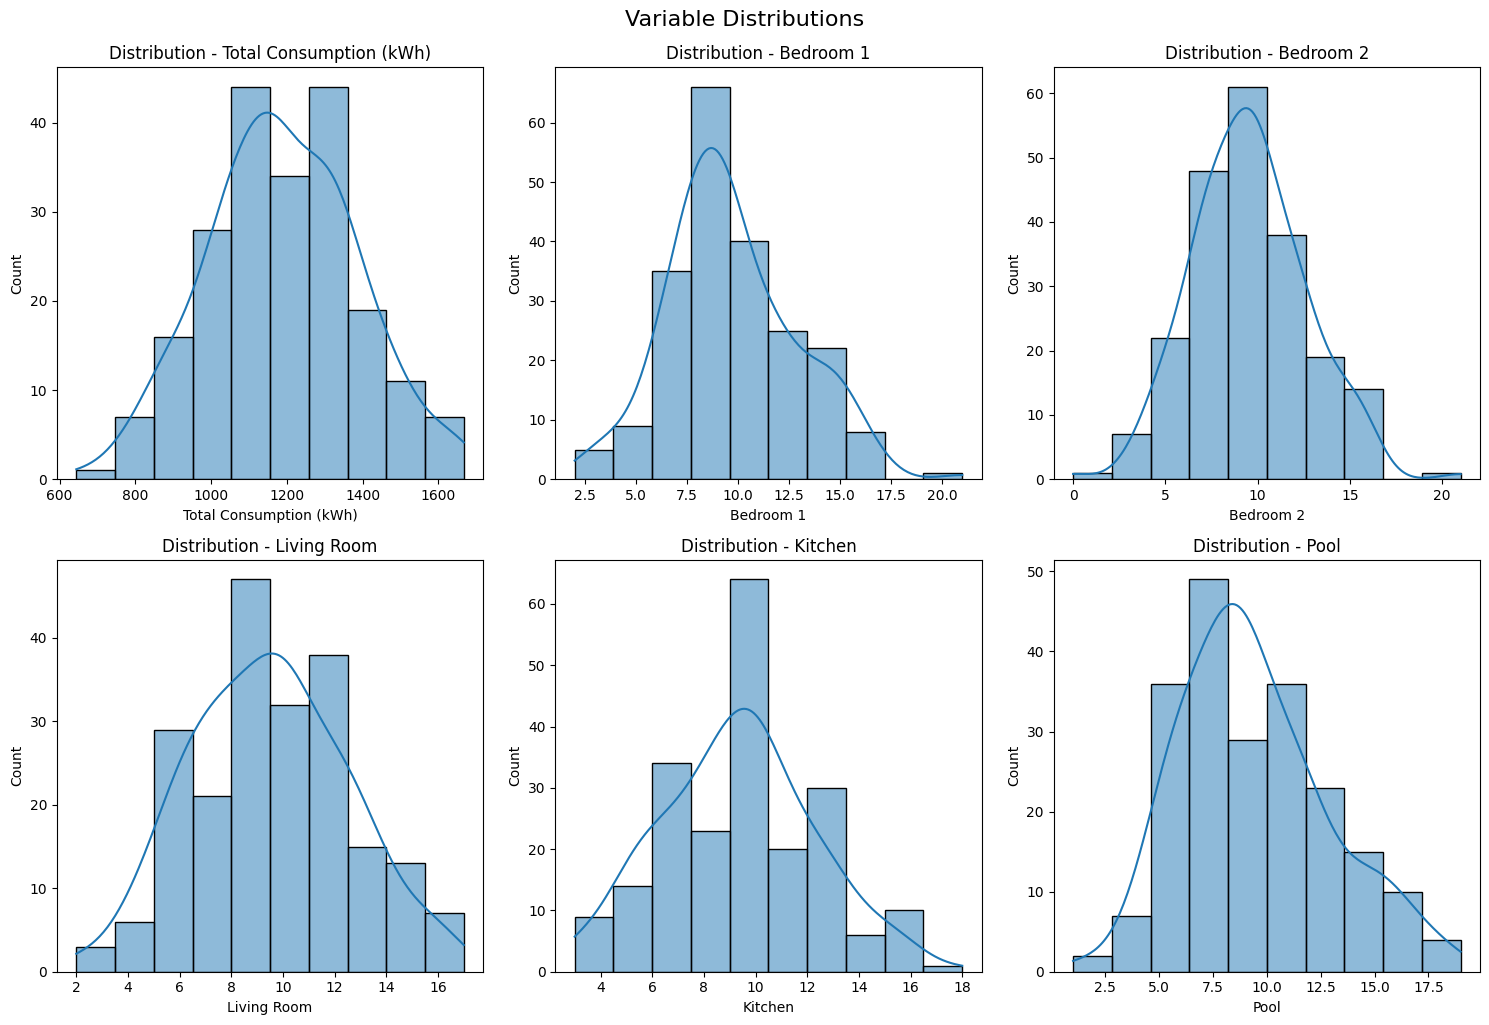

(                      Data  Total Consumption (kWh)   Bedroom 1   Bedroom 2  \
 count                  211               211.000000  211.000000  211.000000   
 mean   2025-04-16 00:00:00              1188.317536    9.687204    9.549763   
 min    2025-01-01 00:00:00               644.000000    2.000000    0.000000   
 25%    2025-02-22 12:00:00              1057.000000    8.000000    7.000000   
 50%    2025-04-16 00:00:00              1176.000000    9.000000    9.000000   
 75%    2025-06-07 12:00:00              1324.000000   12.000000   11.500000   
 max    2025-07-30 00:00:00              1667.000000   21.000000   21.000000   
 std                    NaN               197.439318    3.176817    3.073874   
 
        Living Room     Kitchen        Pool  
 count   211.000000  211.000000  211.000000  
 mean      9.445498    9.322275    9.383886  
 min       2.000000    3.000000    1.000000  
 25%       7.000000    7.000000    7.000000  
 50%       9.000000    9.000000    9.000000  
 7

In [30]:
# Descriptive statistics
summary = df.describe()

# Correlation between variables
correlation = df.corr(numeric_only=True)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

cols = df.columns[1:7]  # select only 6 columns

# Translation dictionary for column names
col_translation = {
    'KW/H': 'Total Consumption (kWh)',
    'Quarto1': 'Bedroom 1',
    'Quarto2': 'Bedroom 2',
    'Sala': 'Living Room',
    'Cozinha': 'Kitchen',
    'Piscina': 'Pool'
}

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=10)
    axes[i].set_title(f'Distribution - {col_translation.get(col, col)}')
    axes[i].set_xlabel(col_translation.get(col, col))

plt.tight_layout()
plt.suptitle("Variable Distributions", fontsize=16, y=1.02)
plt.show()

summary.rename(columns=col_translation), correlation.rename(index=col_translation, columns=col_translation)

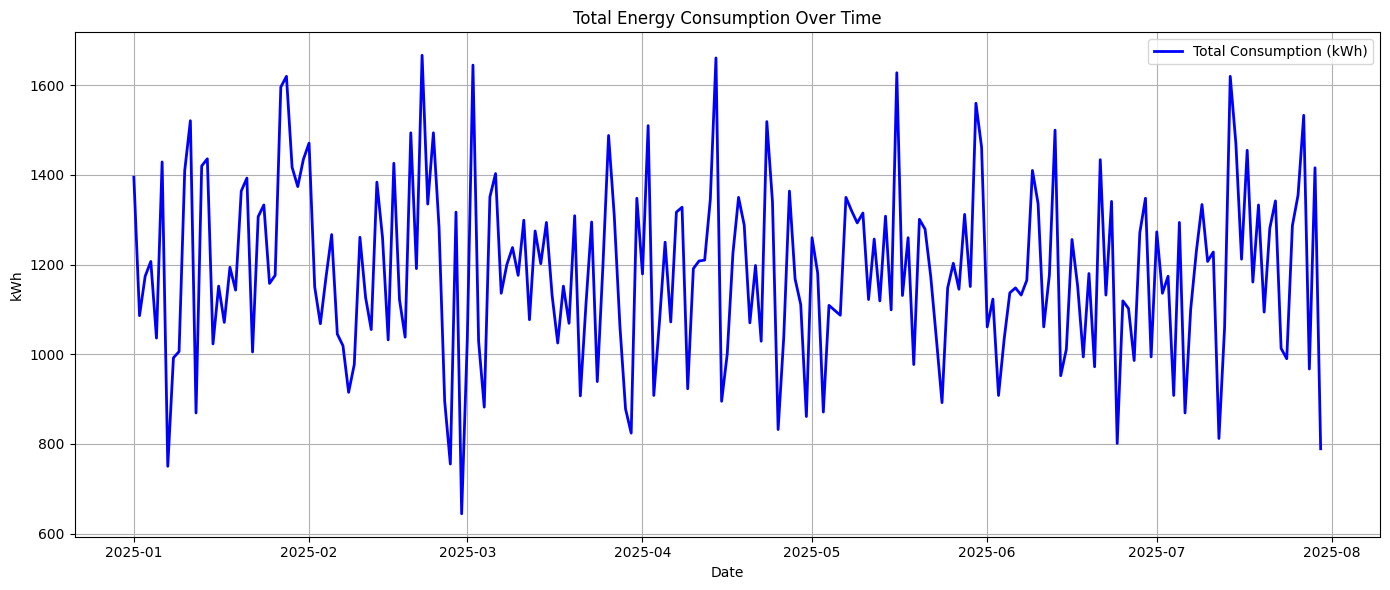

In [31]:
# Plot total consumption over time
plt.figure(figsize=(14, 6))
plt.plot(df['Data'], df['KW/H'], label='Total Consumption (kWh)', color='blue', linewidth=2)
plt.title('Total Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

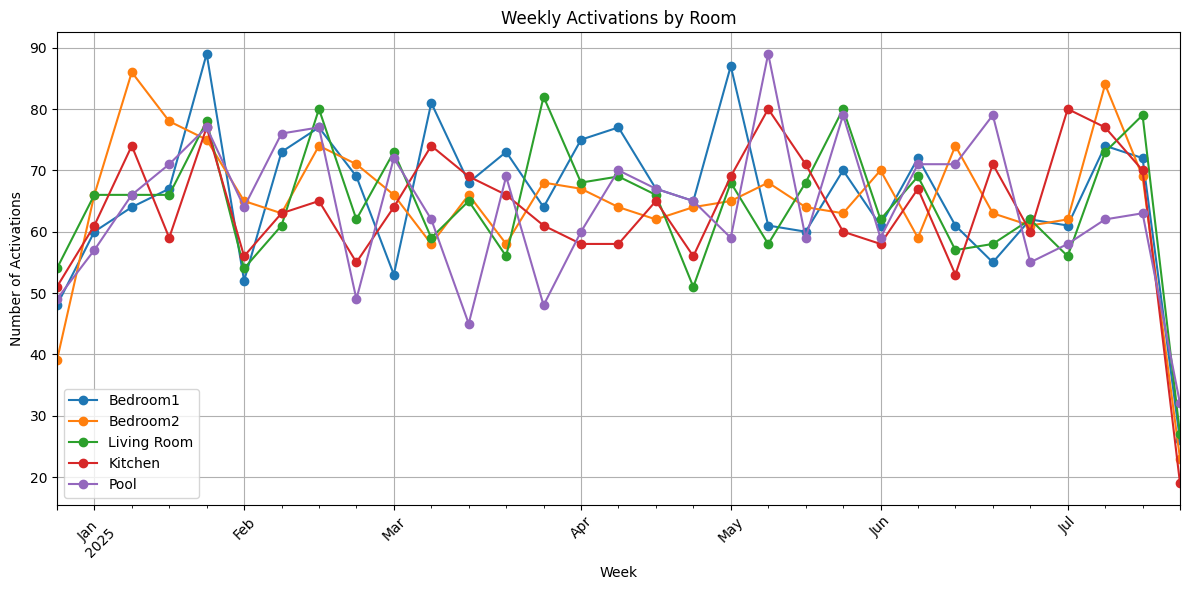

In [32]:
# Group by week (using the start of the week as reference)
df['Week'] = df['Data'].dt.to_period('W').apply(lambda r: r.start_time)
df_week = df.groupby('Week')[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']].sum()

# Rename columns to English
df_week = df_week.rename(columns={
    'Quarto1': 'Bedroom1',
    'Quarto2': 'Bedroom2',
    'Sala': 'Living Room',
    'Cozinha': 'Kitchen',
    'Piscina': 'Pool'
})

# Plot
df_week.plot(figsize=(12, 6), marker='o')
plt.title('Weekly Activations by Room')
plt.ylabel('Number of Activations')
plt.xlabel('Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/sp/qr0jn46s10x5j0y77wb390d00000gn/T/ipykernel_62370/1642397127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


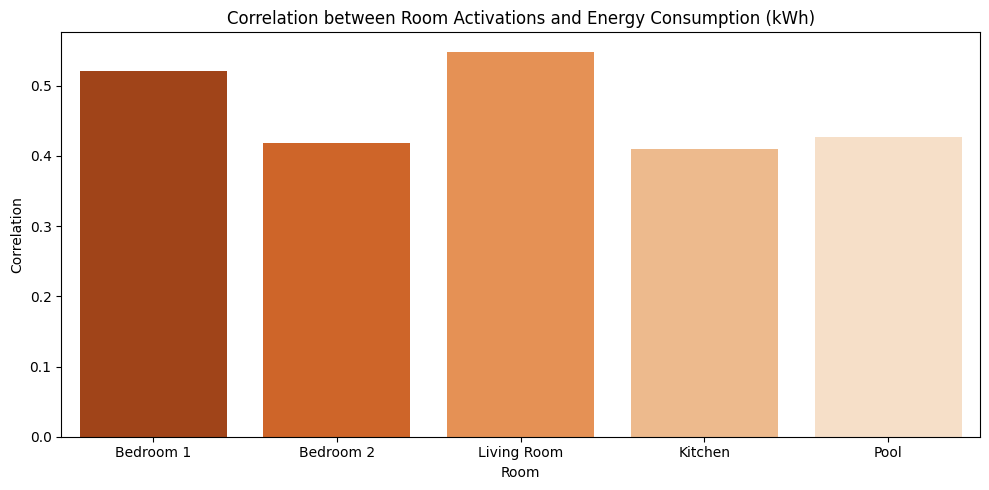

In [33]:
# Correlation between activations and consumption
correlations = df[['KW/H', 'Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']].corr()['KW/H'][1:]

# Translation dictionary for room names
room_translation = {
    'Quarto1': 'Bedroom 1',
    'Quarto2': 'Bedroom 2',
    'Sala': 'Living Room',
    'Cozinha': 'Kitchen',
    'Piscina': 'Pool'
}

# Plot: Correlation with consumption
plt.figure(figsize=(10, 5))
sns.barplot(
    x=[room_translation.get(col, col) for col in correlations.index],
    y=correlations.values,
    palette='Oranges_r'
)
plt.title('Correlation between Room Activations and Energy Consumption (kWh)')
plt.ylabel('Correlation')
plt.xlabel('Room')
plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 11528.06
Coefficient of Determination (R²): 0.7


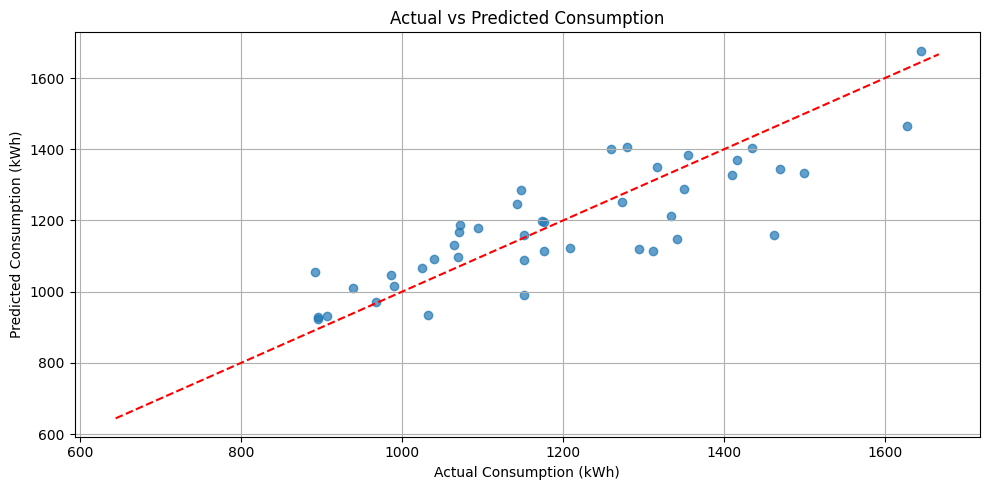


Contribution of each room to the prediction (coefficients):
Sala       28.214005
Quarto2    24.141777
Quarto1    23.279552
Cozinha    20.993133
dtype: float64


In [34]:
from sklearn.metrics import mean_squared_error

# 2. Select variables
X = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha']]
y = df['KW/H']

# 3. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse, 2))
print("Coefficient of Determination (R²):", round(r2, 2))

# 7. Visualize: actual vs predicted consumption
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Consumption (kWh)")
plt.ylabel("Predicted Consumption (kWh)")
plt.title("Actual vs Predicted Consumption")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Show coefficients for each room
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nContribution of each room to the prediction (coefficients):")
print(coefficients.sort_values(ascending=False))

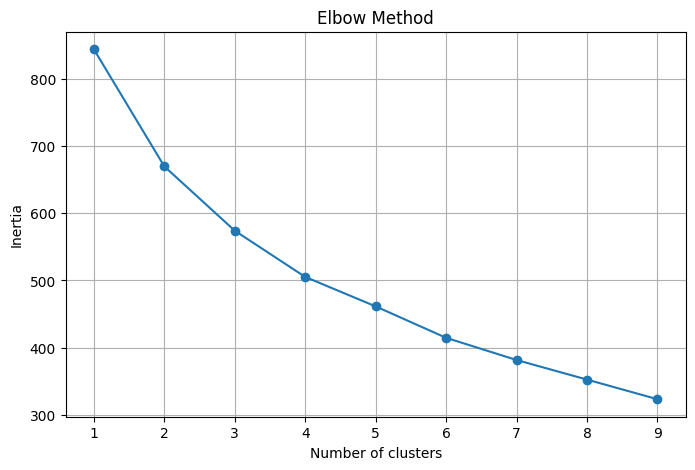

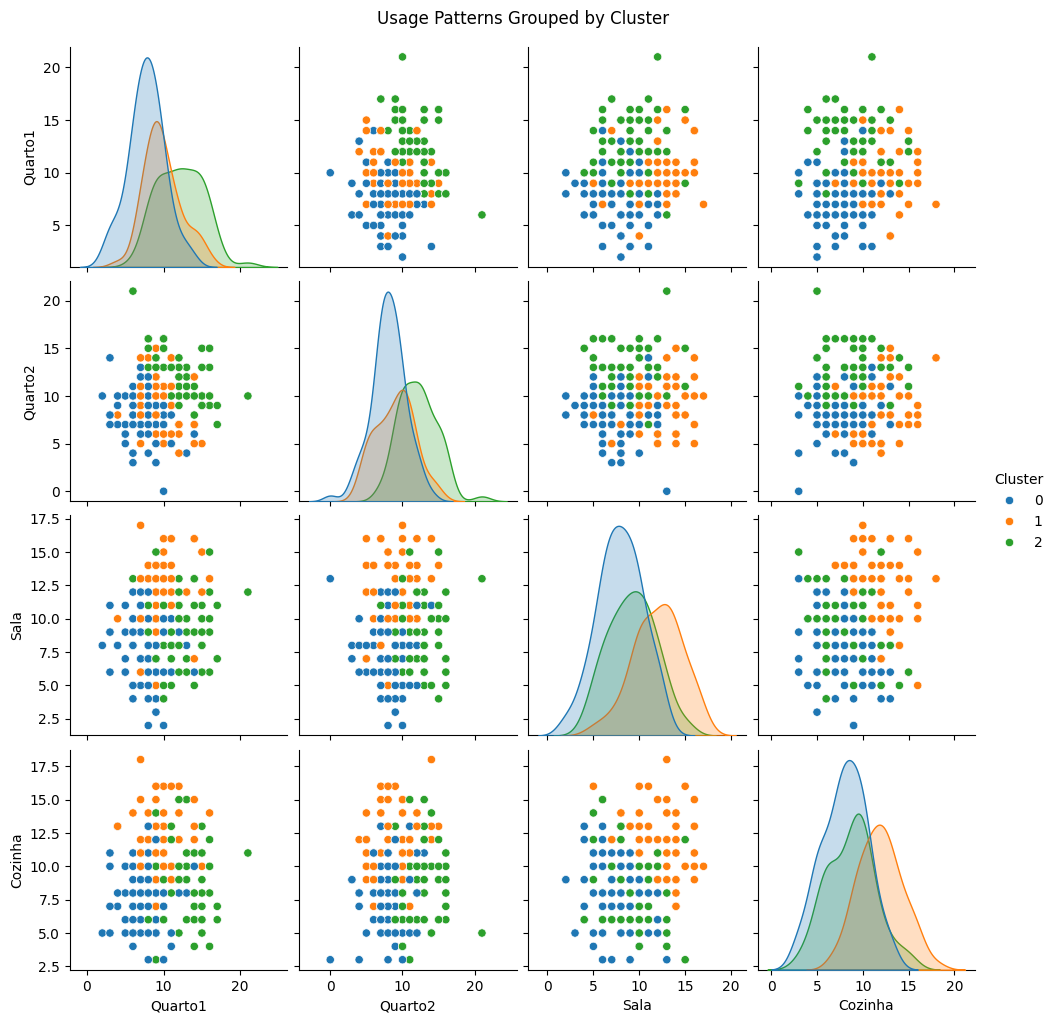

In [35]:
# --- Step 1: Calculate total and percentage of activations per day
df['Total_activations'] = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha']].sum(axis=1)
for room in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']:
    df[f'{room}_pct'] = df[room] / df['Total_activations']

# Normalization (very important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find the ideal number of clusters
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# From the plot, choose the number of clusters; here we use 3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster visualization (pairplot of variables)
sns.pairplot(df, hue='Cluster', vars=['Quarto1', 'Quarto2', 'Sala', 'Cozinha'], palette='tab10')
plt.suptitle("Usage Patterns Grouped by Cluster", y=1.02)
plt.show()


In [36]:
# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate average profile per cluster (with activations and percentages)
col_pcts = [f'{c}_pct' for c in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha']]
profile_clusters = df.groupby('Cluster')[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'KW/H'] + col_pcts].mean()

# Function to name the cluster profile considering consumption and activation percentage
def name_cluster(row):
    mean_kw = df['KW/H'].mean()

    if row['KW/H'] < mean_kw * 0.75:
        total_consumption = '🔵 Low Consumption'
    elif row['KW/H'] > mean_kw * 1.25:
        total_consumption = '🔴 High Consumption'
    else:
        total_consumption = '🟡 Balanced Consumption'

    high = []
    for room in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha']:
        mean_pct = df[f'{room}_pct'].mean()
        if row[f'{room}_pct'] > mean_pct * 1.2:  # 20% above average percentage
            high.append(room)

    if total_consumption == '🔵 Low Consumption':
        return total_consumption
    if total_consumption == '🟡 Balanced Consumption':
        if len(high) == 0:
            return total_consumption
        else:
            return f"🟠 High Consumption in {', '.join(high)}"
    if total_consumption == '🔴 High Consumption':
        if len(high) == 0:
            return total_consumption
        else:
            return f"🔴 High Consumption (In {', '.join(high)})"

profile_clusters['Profile'] = profile_clusters.apply(name_cluster, axis=1)

# Function to map profile to recommendation dictionary key
def map_profile_to_key(profile):
    if profile == '🔵 Low Consumption':
        return profile
    if profile == '🟡 Balanced Consumption':
        return profile
    if profile.startswith('🟠 High Consumption'):
        return '🟠 High Consumption'
    if profile.startswith('🔴 High Consumption'):
        if 'In' in profile:
            idx = profile.index('In') + 3
            text = profile[idx:]
            main = text.split(',')[0].strip()
            if main in ['Sala']:
                return '🔴 High Consumption (Living Room/Kitchen)'
            elif main == 'Cozinha':
                return '🔴 High Consumption (Kitchen)'
            else:
                return '🔴 High Consumption'
        else:
            return '🔴 High Consumption'
    return profile

# Dictionary with recommendations per profile
recommendations = {
    '🔵 Low Consumption': [
        "✅ Maintain the good practices already adopted.",
        "🎁 Offer rewards or discounts (gamification).",
        "🔋 Encourage the use of solar energy / microgeneration."
    ],
    '🟡 Balanced Consumption': [
        "🔌 Automate turning off equipment at fixed times.",
        "🕵️ Install presence sensors in bedrooms and living room.",
        "📊 Send weekly comparative usage reports."
    ],
    '🟠 High Consumption': [
        "🛏️ Automate lights and electronics in rooms with high consumption.",
        "🕵️ Install specific presence sensors for the rooms.",
        "📊 Monitor usage to identify unnecessary peaks."
    ],
    '🔴 High Consumption (Living Room/Kitchen)': [
        "💧 Schedule kitchen pump operation outside peak hours.",
        "💡 Encourage conscious use of lighting and electronics.",
        "🧠 Suggest automation and adherence to the white tariff."
    ],
    '🔴 High Consumption (Kitchen)': [
        "🍳 Check kitchen equipment for excessive consumption.",
        "⏰ Control usage times for oven and refrigerator.",
        "💡 Encourage efficient use of lighting."
    ]
}

# Display profiles and recommendations
for cluster_id, row in profile_clusters.iterrows():
    print(f"\n=== Cluster {cluster_id} - {row['Profile']} ===")
    print("📊 Average consumption profile (activations and kWh):")
    print(row[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'KW/H']])
    print("\n📈 Average percentage of activations per room (%):")
    print((row[col_pcts] * 100).round(2))
    print("\n💡 Recommendations:")
    key = map_profile_to_key(row['Profile'])
    if key in recommendations:
        for rec in recommendations[key]:
            print("-", rec)
    else:
        print("- No specific recommendations for this profile.")



=== Cluster 0 - 🟡 Balanced Consumption ===
📊 Average consumption profile (activations and kWh):
Quarto1       7.747126
Quarto2       8.034483
Sala          7.908046
Cozinha       8.011494
KW/H       1047.402299
Name: 0, dtype: object

📈 Average percentage of activations per room (%):
Quarto1_pct    24.481434
Quarto2_pct    25.376404
Sala_pct       24.970192
Cozinha_pct     25.17197
Name: 0, dtype: object

💡 Recommendations:
- 🔌 Automate turning off equipment at fixed times.
- 🕵️ Install presence sensors in bedrooms and living room.
- 📊 Send weekly comparative usage reports.

=== Cluster 1 - 🟡 Balanced Consumption ===
📊 Average consumption profile (activations and kWh):
Quarto1       9.830508
Quarto2       8.966102
Sala         11.983051
Cozinha      11.915254
KW/H       1290.898305
Name: 1, dtype: object

📈 Average percentage of activations per room (%):
Quarto1_pct    23.031643
Quarto2_pct     20.88838
Sala_pct       28.055102
Cozinha_pct    28.024875
Name: 1, dtype: object

💡 Recomm

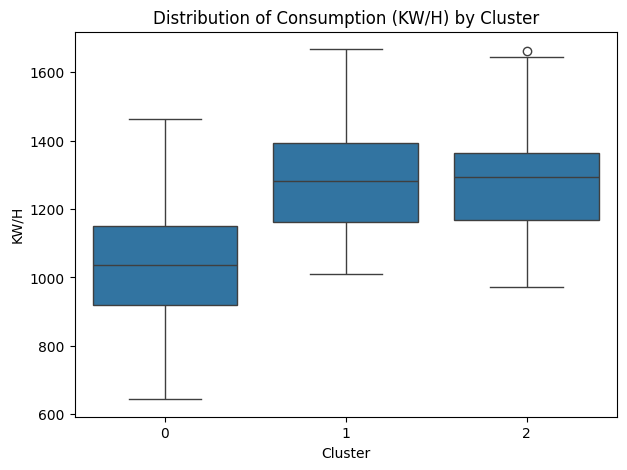

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Cluster', y='KW/H', data=df)
plt.title('Distribution of Consumption (KW/H) by Cluster')
plt.show()


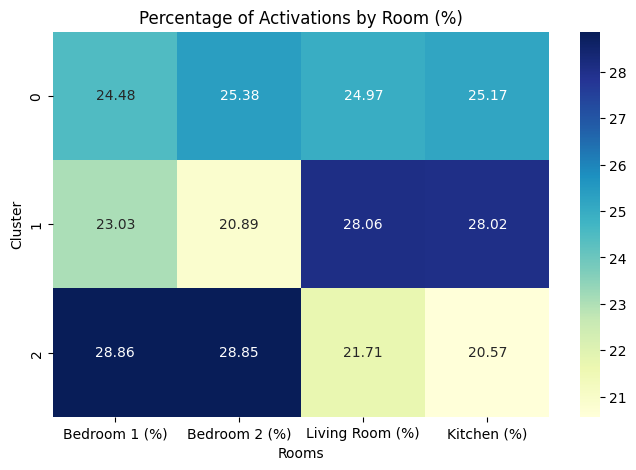

In [40]:
# Translate columns to English for the heatmap
col_translation_en = {
    'Quarto1_pct': 'Bedroom 1 (%)',
    'Quarto2_pct': 'Bedroom 2 (%)',
    'Sala_pct': 'Living Room (%)',
    'Cozinha_pct': 'Kitchen (%)'
}
heatmap_data_en = heatmap_data.rename(columns=col_translation_en)

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data_en, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Percentage of Activations by Room (%)')
plt.xlabel('Rooms')
plt.ylabel('Cluster')
plt.show()


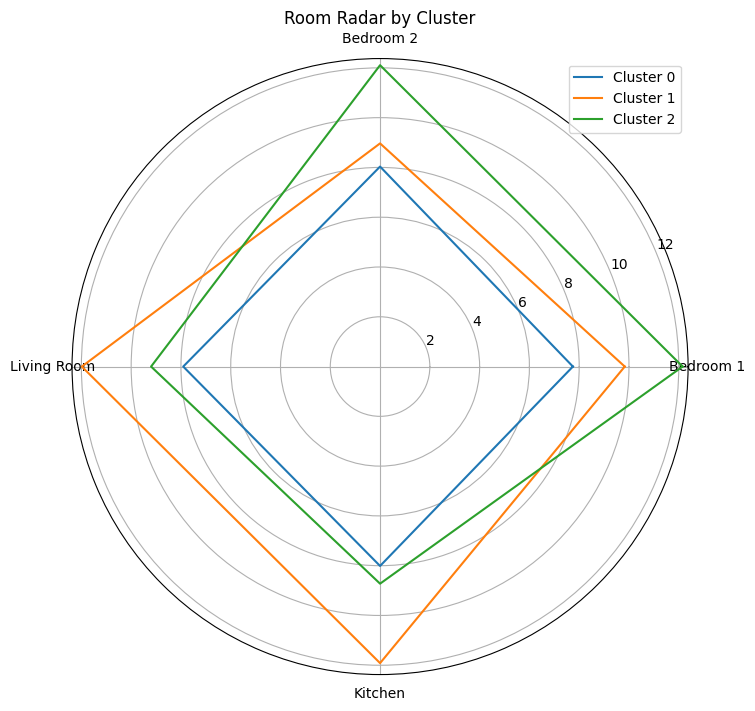

In [41]:
# Use normalized values per cluster
categories = ['Quarto1', 'Quarto2', 'Sala', 'Cozinha']
categories_en = ['Bedroom 1', 'Bedroom 2', 'Living Room', 'Kitchen']
angles = np.linspace(0, 2 * np.pi, len(categories_en), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

plt.figure(figsize=(10, 8))
for i, row in profile_clusters.iterrows():
    values = [row[cat] for cat in categories]
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {i}')

plt.xticks(angles[:-1], categories_en)
plt.title('Room Radar by Cluster')
plt.legend()
plt.show()

## 📊 Radar Chart Interpretation by Cluster

---

### 🧭 Axes (Bedroom1, Bedroom2, Living Room, Kitchen)

Each axis represents a **room in the house**, and the values indicate the **average number of activations** in that room for each **cluster** identified by the KMeans algorithm.

---

### 📊 Colored Lines = Clusters

#### 🔵 Cluster 0 (Blue)
- Low activations in all rooms.  
- Balanced profile, no room stands out much.  
- Probably associated with **low or moderate consumption**.

#### 🟠 Cluster 1 (Orange)
- High activity in **Living Room** and **Kitchen**.  
- Also high averages in **Bedroom1** and **Bedroom2**.  
- Likely represents **high consumption users**, especially in **social areas**.

#### 🟢 Cluster 2 (Green)
- High activations in **Bedroom1** and **Bedroom2**, but lower in **Living Room** and **Kitchen**.  
- Indicates a profile more focused on **private rooms** (bedrooms).  
- May represent families who **spend more time in bedrooms** than in social areas.

---

### 🧠 General Interpretation

| Cluster | Profile                      | Highlights                                              |
|:-------:|------------------------------|---------------------------------------------------------|
|   0     | 🔵 Balanced/Low Consumption  | No room stands out – all at or below average.           |
|   1     | 🟠 High consumption in social areas | Living Room and Kitchen with **activation peaks**. |
|   2     | 🟢 High consumption in bedrooms | Bedroom1 and Bedroom2 with **higher activations**.   |

---

✅ Use this analysis to guide **automation, savings, and consumption optimization actions** according to each group’s profile.


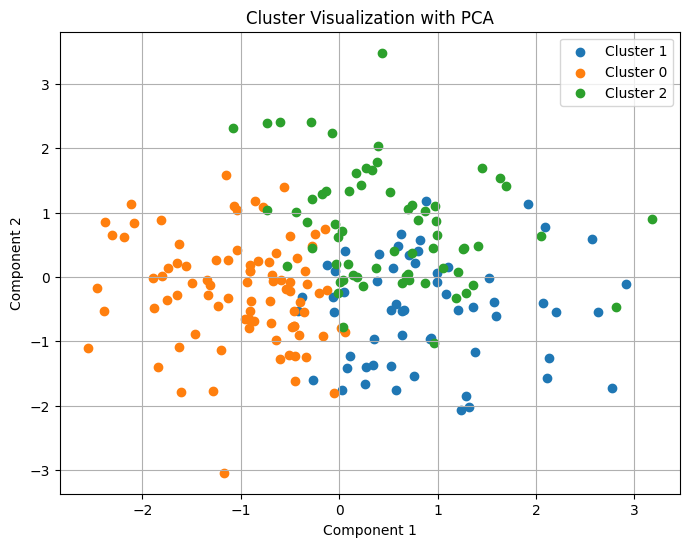

In [42]:
# Reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame with components and clusters
df_plot = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
df_plot['Cluster'] = df['Cluster']

# Plot
plt.figure(figsize=(8,6))
for cluster in df_plot['Cluster'].unique():
    plt.scatter(
        df_plot[df_plot['Cluster'] == cluster]['Component 1'],
        df_plot[df_plot['Cluster'] == cluster]['Component 2'],
        label=f'Cluster {cluster}'
    )
plt.title('Cluster Visualization with PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

# 🧠 Final Report – Digital Twin for Energy Monitoring

## 🎯 Project Objective
Develop a solution based on data science and artificial intelligence to **monitor, predict, and optimize electricity consumption in a smart home** (Smart City Laguna). The project simulates sensor data by room and uses machine learning to anticipate consumption patterns and propose savings actions.

---

## 📊 Database Used
A **simulated database** was used, containing daily records with the following variables:

- `Date`: Measurement day
- `KW/H`: Total energy consumption in kWh
- `Bedroom1`, `Bedroom2`, `Living Room`, `Kitchen`, `Pool`: Number of sensor activations in each room
- `Solar Generation`: Energy generated by solar panels (simulated)

---

## 🔍 Business Question
> “How to predict daily energy consumption based on room-by-room behavior and, from this, propose automatic measures for savings and energy efficiency?”

---

## 🧪 Methodology and Steps Performed

1. **Data Import and Visualization**  
   Reading the spreadsheet with `pandas` and validating formats.

2. **Preprocessing**  
   - Converting the `Date` column to `datetime` format.
   - Creating the `Ordinal_Day` variable for modeling.
   - Calculating average consumption per activation by room.
   - Simulating solar generation and projecting future consumption.

3. **Predictive Modeling**  
   A **Linear Regression** model was trained to estimate consumption (`KW/H`) based on the total activations per room. The next day's forecast was also implemented.

4. **Visualizations**  
   - Time series charts with `Plotly`.
   - Ranking of the most energy-consuming rooms.
   - 3D representations of activations simulating sensors.
   - Interactive dashboard with Streamlit for real-time visualization.

5. **Report Export**  
   Automatic PDF generation with relevant data, charts, and forecasts.

---

## 📈 Results Obtained

- The regression model showed good ability to predict consumption based on activations.
- It was identified that **Living Room** and **Kitchen** are the rooms with the greatest impact on consumption.
- The **pool** was removed from the model; although it has few activations, it shows high average consumption per activation, indicating waste, since the Laguna project is intended for social housing and does not include a pool.
- Solar generation can offset a significant part of consumption during peak hours if well managed.

---

## ✅ Conclusions and Recommendations

- **Automating shutdowns** in high-use areas like the living room and kitchen can generate immediate savings.
- **Scheduling pool usage times** can mitigate unjustified consumption peaks.
- **Leveraging solar generation** to balance appliance use during peak generation hours.
- **Implementing alerts** when the daily consumption target is exceeded.

---

## 🧾 Deliverables

- Streamlit application with real-time sensor visualization.
- PDF report with consumption metrics and suggestions.
- Notebook with the entire data pipeline, predictive model, and visual analyses.

---

## 👥 Target Audience
This project was developed for an external client interested in **residential energy efficiency solutions**, with potential for expansion to condominiums, buildings, and smart cities.

---

📌 *This report was prepared based on data science practices applied to the context of residential energy consumption and aims to facilitate decision-making by the end client.*


Fim!! ⚡